In [3]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [6]:
df['target'].unique()

array([0, 1, 2])

In [7]:
dff = df.drop(['target'], axis=1)
corr = dff.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


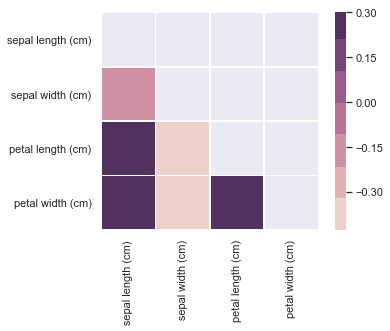

In [10]:
import numpy as np

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr, mask=mask, cmap=sns.cubehelix_palette(8), vmax=.3, center=0, linewidths=.5, square=True)


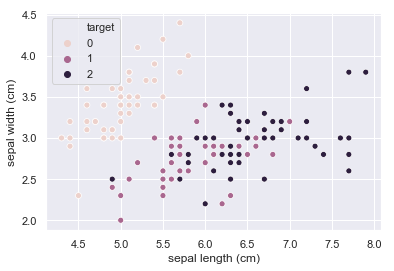

In [49]:
sns.scatterplot(
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='target',
    data=df
)

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(dff)
dft = pd.DataFrame(pca.transform(dff))

dft['target'] = df['target']

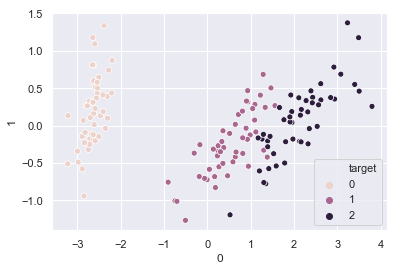

In [58]:
sns.scatterplot(x=0, y=1, hue='target', data=dft)